# Let the Tensors Flow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("drive/MyDrive/Colab Notebooks/IDL")

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset

11490434/11490434 [==============================] - 0s 0us/step


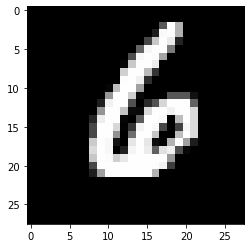

6


In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# we can look at any of the images and the corresponding labels
# say, image no. 155
plt.imshow(train_images[155], cmap="Greys_r")
plt.show()
print(train_labels[155])

# images are "flattened" into vectors
data = MNISTDataset(train_images.reshape([-1, 28*28]), train_labels, 
                    test_images.reshape([-1, 28*28]), test_labels,
                    batch_size=128)

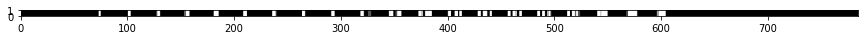

In [ ]:
# here is an attempt at illustrating what flattening looks like
reshaped = train_images[155].reshape((1, 28*28))
plt.figure(figsize=(15, 0.1))
plt.pcolormesh(reshaped, cmap="Greys_r")
plt.show()

In [ ]:
# 60000 elements in the training set
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


# Perceptron (as given)

In [ ]:
# define the linear model
# weight dimensions are completely determined by input/output dimensions
W = tf.Variable(np.zeros([28*28, 10]).astype(np.float32))
b = tf.Variable(np.zeros(10, dtype=np.float32))

def model(inputs):
    return tf.matmul(inputs, W) + b


train_steps = 2000
learning_rate = 0.1

In [ ]:
# training loop
for step in range(train_steps+1):
    image_batch, label_batch = data.next_batch()

    with tf.GradientTape() as tape:
        logits = model(image_batch)
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=label_batch))
        
    grads = tape.gradient(xent, [W, b])
    W.assign_sub(learning_rate * grads[0])
    b.assign_sub(learning_rate * grads[1])
    
    # every so often we print loss/accuracy
    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, label_batch),
                             tf.float32))
        print("Step {}. Batch loss: {} Batch accuracy: {}".format(step+1, xent, acc))


Step 1. Batch loss: 2.3025851249694824 Batch accuracy: 0.078125
Step 101. Batch loss: 0.605804979801178 Batch accuracy: 0.84375
Step 201. Batch loss: 0.4368754029273987 Batch accuracy: 0.8984375
Step 301. Batch loss: 0.4260263442993164 Batch accuracy: 0.90625
Step 401. Batch loss: 0.44896671175956726 Batch accuracy: 0.8828125
Starting new epoch...
Step 501. Batch loss: 0.489581435918808 Batch accuracy: 0.8984375
Step 601. Batch loss: 0.5072612762451172 Batch accuracy: 0.859375
Step 701. Batch loss: 0.35805097222328186 Batch accuracy: 0.890625
Step 801. Batch loss: 0.33612585067749023 Batch accuracy: 0.8828125
Step 901. Batch loss: 0.26156505942344666 Batch accuracy: 0.9140625
Starting new epoch...
Step 1001. Batch loss: 0.3693747818470001 Batch accuracy: 0.8671875
Step 1101. Batch loss: 0.30427253246307373 Batch accuracy: 0.90625
Step 1201. Batch loss: 0.2547870874404907 Batch accuracy: 0.921875
Step 1301. Batch loss: 0.39292067289352417 Batch accuracy: 0.875
Step 1401. Batch loss: 0.2

In [ ]:
test_preds = tf.argmax(model(data.test_data), axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print("Test accuracy: {}".format(acc))


Test accuracy: 0.9168999791145325


# Multi Layer Perceptron

## Low level code of an MLP with two hidden layers

In [ ]:

def MLP(inputs):
  ## for hidden layer 1
  h1_sum = tf.add(tf.matmul(inputs,weights_hidden_1),bias_hidden_1)
  h1_out = tf.nn.sigmoid(h1_sum)

  ## for hidden layer 2
  h2_sum = tf.add(tf.matmul(h1_out,weights_hidden_2),bias_hidden_2)
  h2_out = tf.nn.sigmoid(h2_sum)

  outputs = tf.add(tf.matmul(h2_out,weights_output),bias_output)


  return outputs

## Handling Dynamic Layers and Activation Functions



*   **init_params()** Initializes all the weights and biases 
*   **forward_propogation()** computes return the outputs given W and b
*   **backwardpass()** computes the gradient based on the error from the forward pass
















In [ ]:

def init_params(minval,maxval,num_layers):
  params = {}
  for i in range(len(num_layers)-1):
    params["w_h"+str(i)] = tf.Variable(tf.random.uniform([num_layers[i],num_layers[i+1]],minval=minval,maxval=maxval))
    params["b_h"+str(i)] = tf.Variable(tf.random.uniform([num_layers[i+1]],minval=minval,maxval=maxval))

  return params

In [ ]:
def apply_activation_functions(activation_fn,x):
  if activation_fn=="sigmoid":
    return tf.nn.sigmoid(x)
  elif activation_fn=="relu":
    return tf.nn.relu(x)
  elif activation_fn=="tanh":
    return tf.nn.tanh(x)


In [ ]:
def forward_propogation(inputs,num_layers,params,activation_fn):

  '''
  inputs = image_batch
  num_layers = size of the layers inlcuding i/p and o/p
  params = weights and biases of num_layers-1
  activation_fn = 
  '''

  layer_outputs = {}
  for i in range(num_layers-1):
    if i==0: #input
      layer_outputs["h_"+str(i)]= tf.add(tf.matmul(inputs,params["w_h"+str(i)]),params["b_h"+str(i)])
      layer_outputs["h_"+str(i)] = apply_activation_functions(activation_fn,layer_outputs["h_"+str(i)])
    elif (i>0) and (i!=num_layers-2): # hidden

      layer_outputs["h_"+str(i)]= tf.add(tf.matmul(layer_outputs["h_"+str(i-1)],params["w_h"+str(i)]),params["b_h"+str(i)])
      layer_outputs["h_"+str(i)] = apply_activation_functions(activation_fn,layer_outputs["h_"+str(i)])

    elif i==num_layers-2:#output
      layer_outputs["output"]= tf.add(tf.matmul(layer_outputs["h_"+str(i-1)],params["w_h"+str(i)]),params["b_h"+str(i)])

  return layer_outputs["output"]

In [ ]:
def backward_pass(image_batch,label_batch,learning_rate,num_layers,params,activation_fn):
  '''
  image_batch = image_batch
  label_batch = label_batch
  learning_rate = learning rate
  num_layers = from forward pass
  params = from forward pass
  activation_fn = name of the activation function
  '''
  with tf.GradientTape() as tape:
    logits = forward_propogation(inputs=image_batch,num_layers=num_layers,params=params,activation_fn=activation_fn)
    xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=label_batch))
    grads = tape.gradient(xent,list(params.values()))

    for i in range(0,len(grads),2):
      params["w_h"+str(i//2)].assign_sub(learning_rate * grads[i])
      params["b_h"+str(i//2)].assign_sub(learning_rate * grads[i+1])
    return logits, xent, params
    

In [ ]:

def train_model(train_steps,learning_rate,num_layers,param_list,activation_fn):
  params = param_list
  batch_loss_over_iter = []
  acc_over_iter = []
  for step in range(train_steps+1):
    image_batch, label_batch = data.next_batch()
    
    logits, xent, params = backward_pass(image_batch,label_batch,learning_rate,len(num_layers),params,activation_fn)
    preds = tf.argmax(logits, axis=1, output_type=tf.int32)
    acc = tf.reduce_mean(tf.cast(tf.equal(preds, label_batch),
                             tf.float32))

    if not step%100:

      batch_loss_over_iter.append(xent.numpy())
      acc_over_iter.append(acc.numpy())

    if not step % 1000:
        print("Step {}. Batch loss: {} Batch accuracy: {}".format(step+1, xent, acc))
  return params, batch_loss_over_iter, acc_over_iter
# for step in range(train_steps+1):
#     image_batch, label_batch = data.next_batch()
    
#     logits, xent, params = backward_pass(image_batch,label_batch,learning_rate,len(num_layers),params,activation_fn)

#     if not step % 1000:
#         preds = tf.argmax(logits, axis=1, output_type=tf.int32)
#         acc = tf.reduce_mean(tf.cast(tf.equal(preds, label_batch),
#                              tf.float32))
#         print("Step {}. Batch loss: {} Batch accuracy: {}".format(step+1, xent, acc))


# Inspection

### Why Inizitalizing to zeros will not work?


> Because all the neurons/cells will have the same weights and biases during the backward pass i.e either all the neurons will be activated or none of them will be activated.



In [ ]:
# training loop
train_steps = 5000
learning_rate = 0.15
num_layers=[784,256,128,10]
params = init_params(0,0,num_layers)
activation_fn = "tanh"
updated_params, _ , _ = train_model(train_steps,learning_rate,num_layers,params,activation_fn)

Step 1. Batch loss: 2.3025851249694824 Batch accuracy: 0.078125
Starting new epoch...
Starting new epoch...
Step 1001. Batch loss: 2.3016867637634277 Batch accuracy: 0.125
Starting new epoch...
Starting new epoch...
Step 2001. Batch loss: 2.2994794845581055 Batch accuracy: 0.109375
Starting new epoch...
Starting new epoch...
Step 3001. Batch loss: 2.3058481216430664 Batch accuracy: 0.125
Starting new epoch...
Starting new epoch...
Step 4001. Batch loss: 2.301622152328491 Batch accuracy: 0.078125
Starting new epoch...
Starting new epoch...
Step 5001. Batch loss: 2.2964794635772705 Batch accuracy: 0.1328125


In [ ]:
image_batch, label_batch = data.next_batch()
logits, xent, params = backward_pass(image_batch,label_batch,learning_rate,len(num_layers),updated_params,activation_fn)
preds = tf.argmax(logits, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(preds, label_batch),
                             tf.float32))
print("Test accuracy is {}%".format(acc*100))

Test accuracy is 9.375%


### Plots for different hyperparameters


In [ ]:
def plot_performance(batch_loss_over_iter,acc_over_iter,tr_size,activation_fn):
  steps =[i for i in range(1,tr_size+2,100)]
  fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(35, 10))
  fig.suptitle("Peformance over {} steps with lr={} and activation={}".format(train_steps,learning_rate,activation_fn))

  ax1.plot(steps,batch_loss_over_iter)
  ax1.set_title("batch loss")
  ax1.set(xlabel="steps",ylabel="cross entropy")
  ax1.grid()
  ax2.plot(steps, acc_over_iter)
  ax2.set_title("Accuracy")
  ax2.set(xlabel="steps",ylabel="accuracy")
  ax2.grid()


Step 1. Batch loss: 2.3002214431762695 Batch accuracy: 0.0703125
Starting new epoch...
Starting new epoch...
Step 1001. Batch loss: 0.2256641387939453 Batch accuracy: 0.921875
Starting new epoch...
Starting new epoch...
Starting new epoch...
Step 2001. Batch loss: 0.09812939167022705 Batch accuracy: 0.96875
Starting new epoch...
Starting new epoch...
Step 3001. Batch loss: 0.2243947684764862 Batch accuracy: 0.953125
Starting new epoch...
Starting new epoch...
Step 4001. Batch loss: 0.05061144009232521 Batch accuracy: 0.9921875
Starting new epoch...
Starting new epoch...
Step 5001. Batch loss: 0.0749925971031189 Batch accuracy: 0.96875


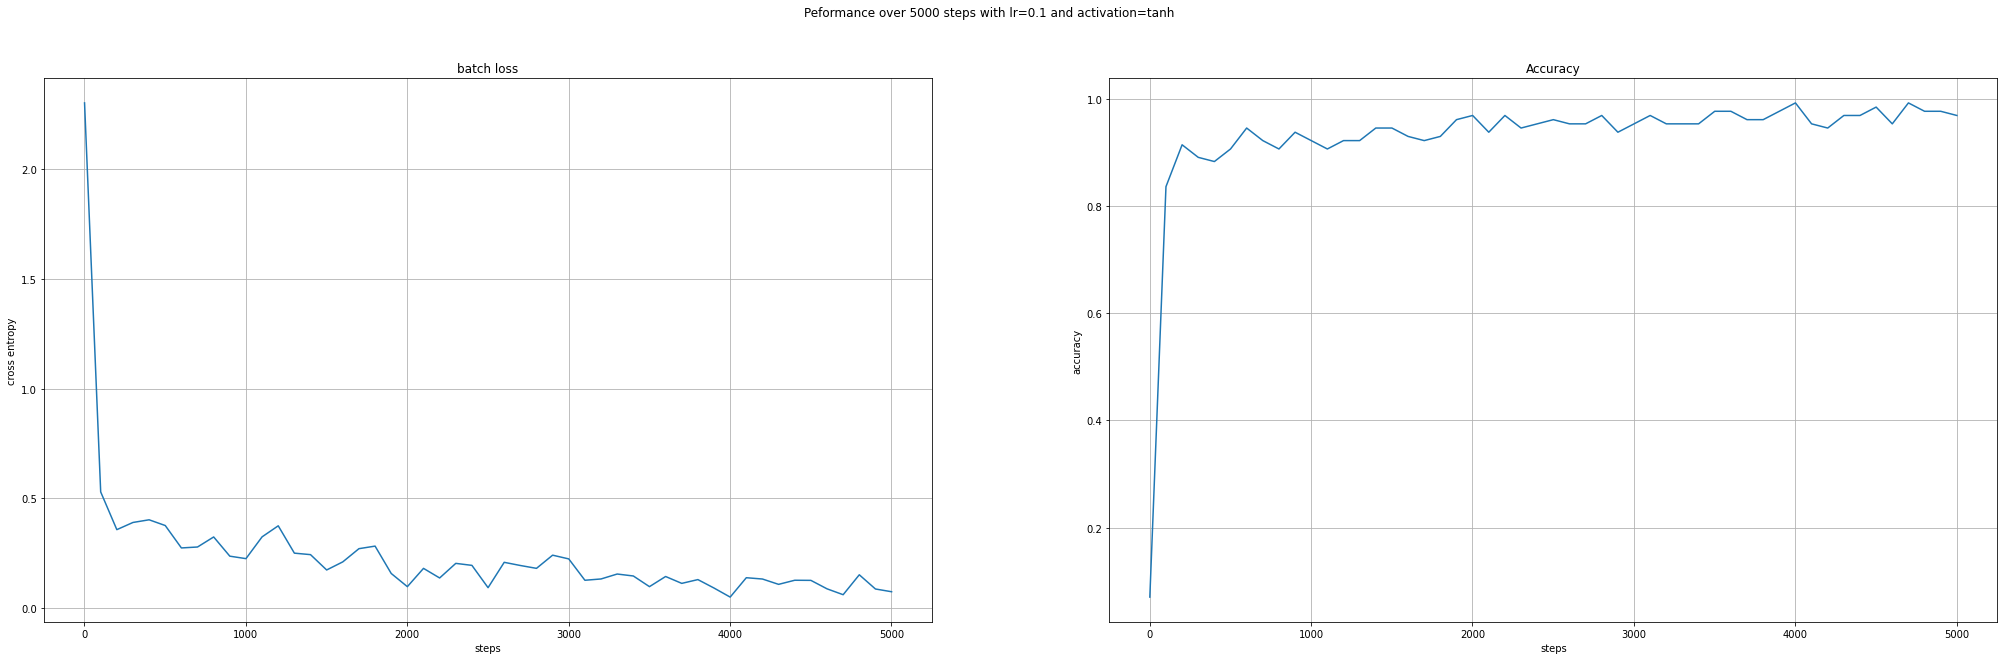

In [ ]:
# training loop
train_steps = 5000
learning_rate = 0.1
num_layers=[784,256,10]
params = init_params(-0.1,0.1,num_layers)
activation_fn = "tanh"
updated_params, batch_loss_over_iter , acc_over_iter = train_model(train_steps,learning_rate,num_layers,params,activation_fn)
plot_performance(batch_loss_over_iter,acc_over_iter,train_steps,activation_fn)

Step 1. Batch loss: 2.4306459426879883 Batch accuracy: 0.125
Starting new epoch...
Starting new epoch...
Step 1001. Batch loss: 1.5342793464660645 Batch accuracy: 0.6328125
Starting new epoch...
Starting new epoch...
Step 2001. Batch loss: 1.1814935207366943 Batch accuracy: 0.6953125
Starting new epoch...
Starting new epoch...
Step 3001. Batch loss: 0.9658396244049072 Batch accuracy: 0.7578125
Starting new epoch...
Starting new epoch...
Starting new epoch...
Step 4001. Batch loss: 0.7169773578643799 Batch accuracy: 0.84375
Starting new epoch...
Starting new epoch...
Step 5001. Batch loss: 0.6275599002838135 Batch accuracy: 0.859375


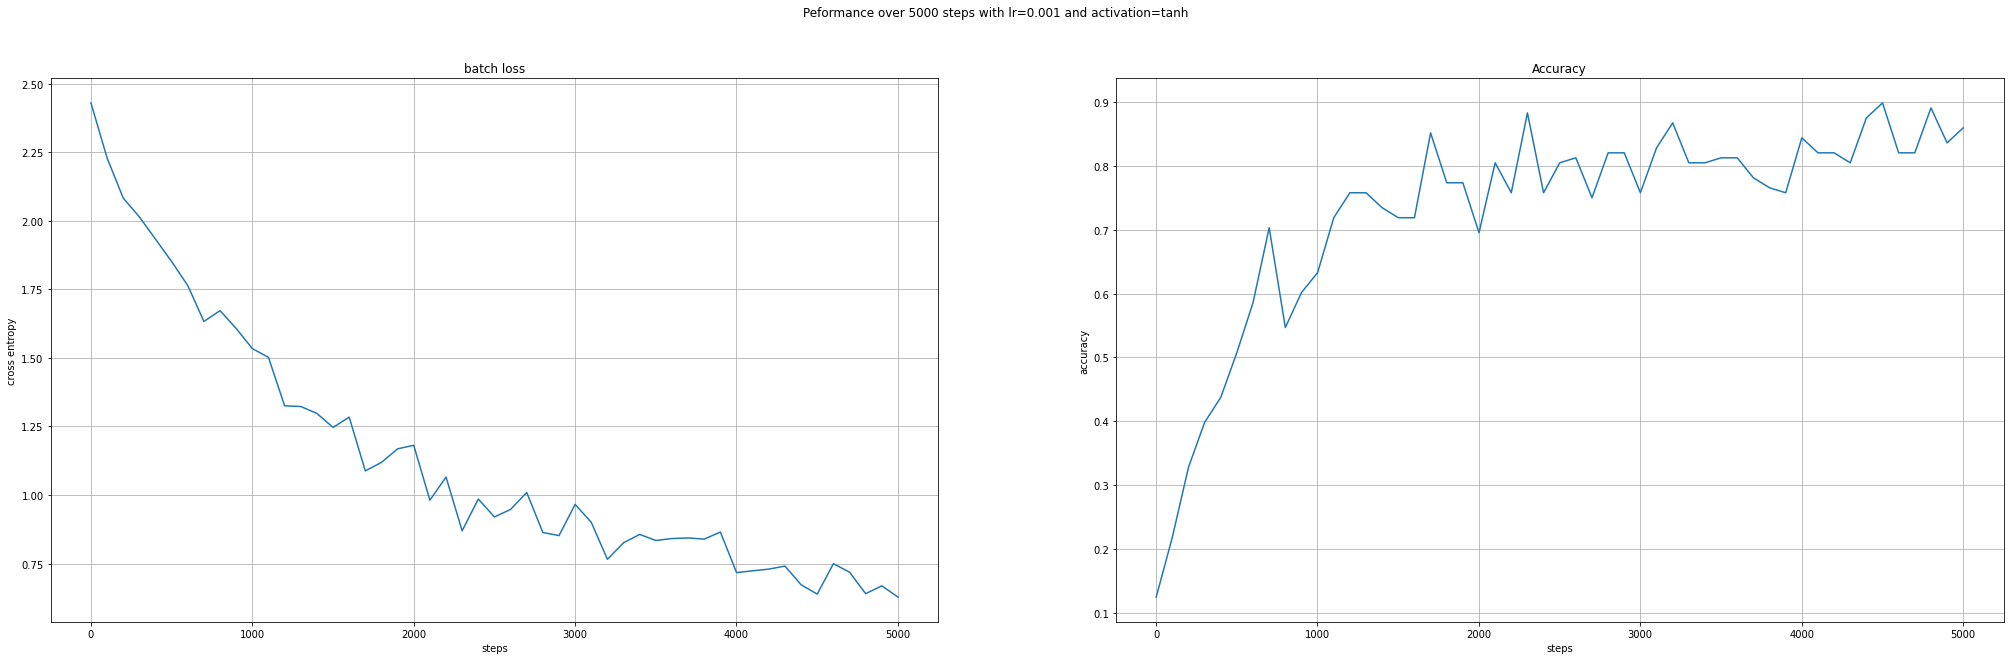

In [ ]:
# training loop
train_steps = 5000
learning_rate = 0.001
num_layers=[784,256,10]
params = init_params(-0.1,0.1,num_layers)
activation_fn = "tanh"
updated_params, batch_loss_over_iter , acc_over_iter = train_model(train_steps,learning_rate,num_layers,params,activation_fn)
plot_performance(batch_loss_over_iter,acc_over_iter,train_steps,activation_fn)


Step 1. Batch loss: 2.478476047515869 Batch accuracy: 0.125
Starting new epoch...
Starting new epoch...
Step 1001. Batch loss: 0.3718910217285156 Batch accuracy: 0.8984375
Starting new epoch...
Starting new epoch...
Step 2001. Batch loss: 0.3254498839378357 Batch accuracy: 0.8828125
Starting new epoch...
Starting new epoch...
Step 3001. Batch loss: 0.20667293667793274 Batch accuracy: 0.9296875
Starting new epoch...
Starting new epoch...
Step 4001. Batch loss: 0.19114357233047485 Batch accuracy: 0.9453125
Starting new epoch...
Starting new epoch...
Step 5001. Batch loss: 0.3208126425743103 Batch accuracy: 0.90625


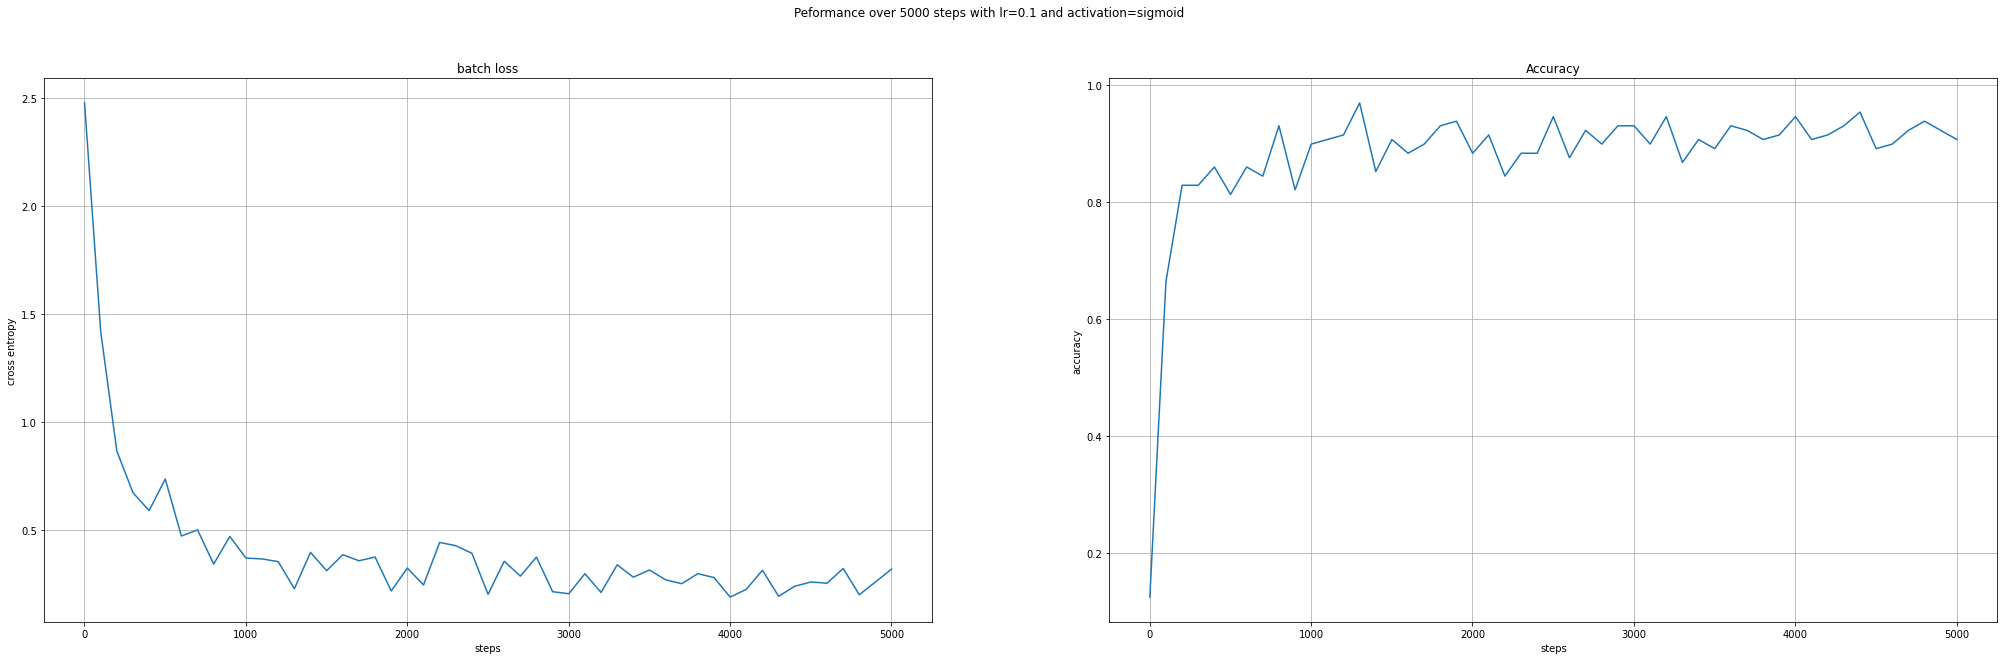

In [ ]:
# training loop
train_steps = 5000
learning_rate = 0.1
num_layers=[784,256,10]
params = init_params(-0.1,0.1,num_layers)
activation_fn = "sigmoid"
updated_params, batch_loss_over_iter , acc_over_iter = train_model(train_steps,learning_rate,num_layers,params,activation_fn)
plot_performance(batch_loss_over_iter,acc_over_iter,train_steps,activation_fn)

Step 1. Batch loss: 2.3951241970062256 Batch accuracy: 0.1484375
Starting new epoch...
Starting new epoch...
Step 1001. Batch loss: 0.19678793847560883 Batch accuracy: 0.953125
Starting new epoch...
Starting new epoch...
Starting new epoch...
Step 2001. Batch loss: 0.21380680799484253 Batch accuracy: 0.921875
Starting new epoch...
Starting new epoch...
Step 3001. Batch loss: 0.08979347348213196 Batch accuracy: 0.984375
Starting new epoch...
Starting new epoch...
Step 4001. Batch loss: 0.13705822825431824 Batch accuracy: 0.9609375
Starting new epoch...
Starting new epoch...
Step 5001. Batch loss: 0.0396047942340374 Batch accuracy: 1.0


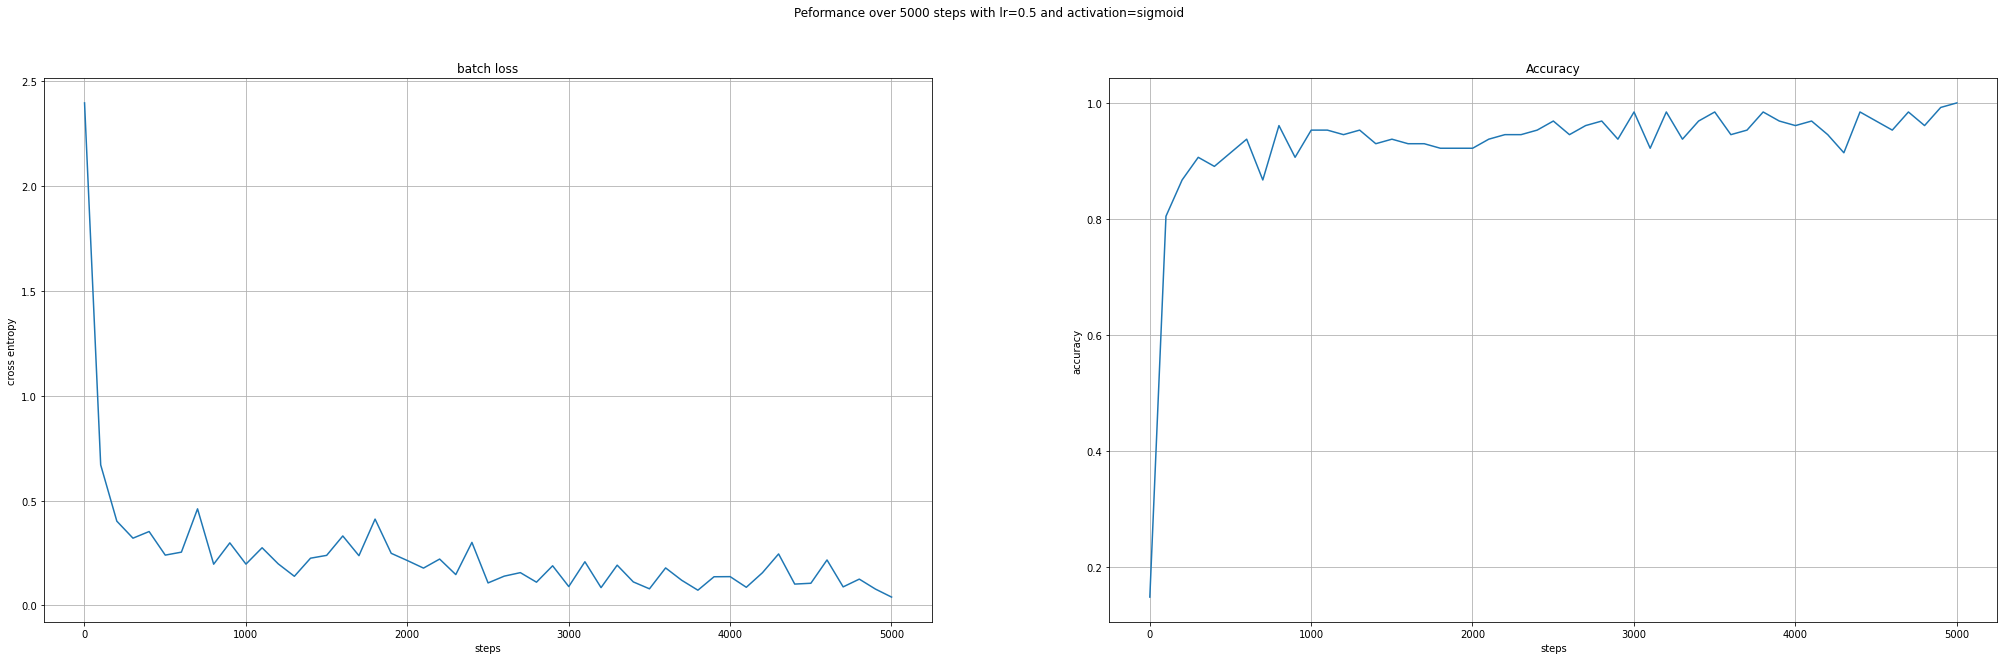

In [ ]:
# training loop
train_steps = 5000
learning_rate = 0.5
num_layers=[784,256,10]
params = init_params(-0.1,0.1,num_layers)
activation_fn = "sigmoid"
updated_params, batch_loss_over_iter , acc_over_iter = train_model(train_steps,learning_rate,num_layers,params,activation_fn)
plot_performance(batch_loss_over_iter,acc_over_iter,train_steps,activation_fn)

### Question on Wrappers

Also, reflect on the Tensorflow interface: If you followed the tutorials you were asked to, you have been using a very low-level approach to defining models as well as their training and evaluation. Which of these parts do you think should be wrapped in higher-level interfaces? Do you feel like you are forced to provide any redundant information when defining your model? Any features you are missing so far?

---

It would be convenient to have a High level API that can be used to define the number of layers, number of neurons in each layer and the activation function to be used. The computations that are being done(as in low-level code) can be shadowed by the wrapper functions. 

## Adding More Hidden Layers

Step 1. Batch loss: 2.3140435218811035 Batch accuracy: 0.1171875
Starting new epoch...
Starting new epoch...
Step 1001. Batch loss: 0.278133749961853 Batch accuracy: 0.9140625
Starting new epoch...
Starting new epoch...
Step 2001. Batch loss: 0.08874034881591797 Batch accuracy: 0.96875
Starting new epoch...
Starting new epoch...
Step 3001. Batch loss: 0.05241044610738754 Batch accuracy: 0.9921875
Starting new epoch...
Starting new epoch...
Step 4001. Batch loss: 0.07398464530706406 Batch accuracy: 0.9765625
Starting new epoch...
Starting new epoch...
Step 5001. Batch loss: 0.03716430068016052 Batch accuracy: 0.984375


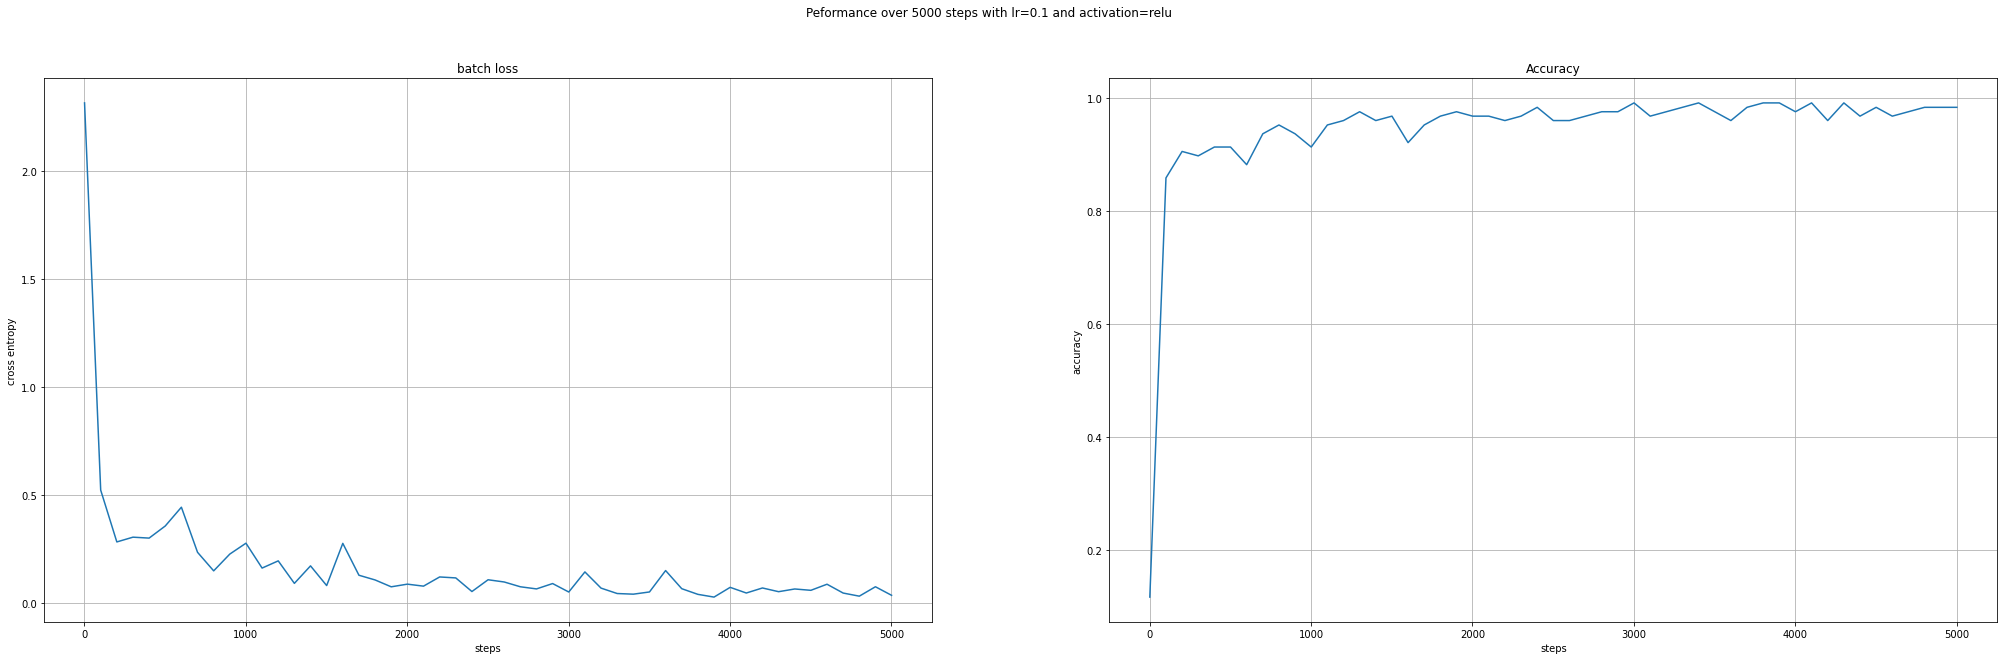

In [ ]:
# training loop
train_steps = 5000
learning_rate = 0.1
num_layers=[784,256,256,10]
params = init_params(-0.1,0.1,num_layers)
activation_fn = "relu"
updated_params, batch_loss_over_iter , acc_over_iter = train_model(train_steps,learning_rate,num_layers,params,activation_fn)
plot_performance(batch_loss_over_iter,acc_over_iter,train_steps,activation_fn)

### Inspection of misclassified instances 

In [ ]:
image_batch, label_batch = data.next_batch()
logits = forward_propogation(inputs=image_batch,num_layers=len(num_layers),params=params,activation_fn=activation_fn)
preds = tf.argmax(logits, axis=1, output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(preds, label_batch),
                             tf.float32))
print("Test accuracy is {}%".format(acc*100))

Test accuracy is 98.4375%


In [ ]:
for  idx, k in enumerate(zip(label_batch,preds)):
  if k[0]!=k[1]:
    print("Index is {}, true label is {} and predicted label is {}".format(idx, k[0], k[1]))

Index is 77, true label is 1 and predicted label is 7
Index is 99, true label is 8 and predicted label is 6


1


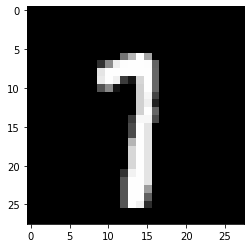

In [ ]:
plt.imshow(image_batch[77].reshape(28,28), cmap="Greys_r")
print(label_batch[77])
plt.show()

The above image looks like a 7 even to a human eye rather than a 1